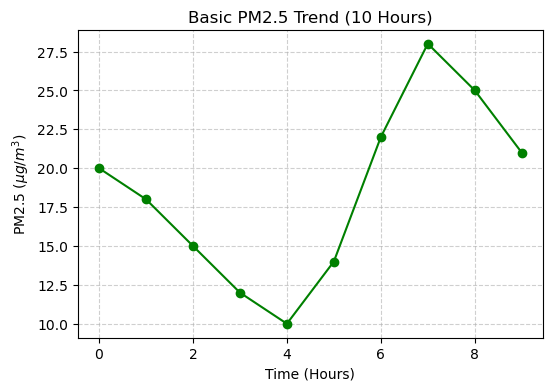

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Mock data for 10 hours
hours = np.arange(10)
pm25_levels = np.array([20, 18, 15, 12, 10, 14, 22, 28, 25, 21])

# Create the plot
plt.figure(figsize=(6, 4))
plt.plot(hours, pm25_levels, marker='o', linestyle='-', color='green')

# Add labels and title
plt.title('Basic PM2.5 Trend (10 Hours)')
plt.xlabel('Time (Hours)')
plt.ylabel('PM2.5 ($\mu g/m^3$)')
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()


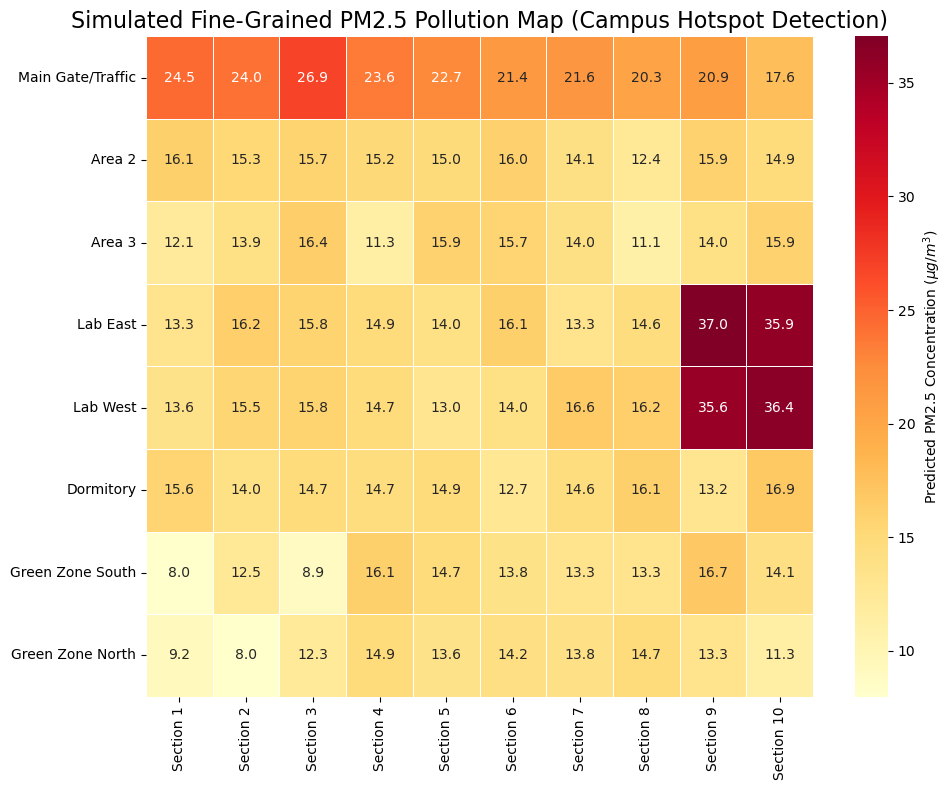

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- 1. Define the Campus Grid and Spatial Data ---

# Define the size of the simulated campus grid (e.g., 8x10 sections)
GRID_SIZE_Y = 8  # North-South (Y-axis: 0=South/Gate, 7=North/Quiet Zone)
GRID_SIZE_X = 10 # East-West (X-axis)

# Create a base matrix (e.g., average PM2.5 level)
base_pollution = np.full((GRID_SIZE_Y, GRID_SIZE_X), 15.0)

# Simulate Hotspots based on your paper's findings:
# 1. Main Gate Traffic (South end: Y=0)
base_pollution[0, :] += np.linspace(10, 5, GRID_SIZE_X) # High pollution near gate, fading slightly east/west

# 2. Science Laboratory/Emissions (Mid-campus, East side)
base_pollution[3:5, 8:10] += 20  # High spike for 2x2 lab area

# 3. Cleaner Green Zones (North-West)
base_pollution[6:8, 0:3] -= 5.0 # Cleaner air in green zones

# Add small random noise for realism
noise = np.random.normal(0, 1.5, (GRID_SIZE_Y, GRID_SIZE_X))
pollution_data = np.clip(base_pollution + noise, a_min=5, a_max=50) # Ensure values stay reasonable

# --- 2. Create Labels for Interpretation ---
row_labels = ['Main Gate/Traffic', 'Area 2', 'Area 3', 'Lab East', 'Lab West', 'Dormitory', 'Green Zone South', 'Green Zone North']
col_labels = [f'Section {i+1}' for i in range(GRID_SIZE_X)]

# Convert to DataFrame for Seaborn plotting (easier labeling)
df_pollution = pd.DataFrame(pollution_data, index=row_labels, columns=col_labels)


# --- 3. Generate the Heatmap Plot ---

plt.figure(figsize=(10, 8))

# Use Seaborn's heatmap function
sns.heatmap(
    df_pollution,
    cmap="YlOrRd", # Yellow-Orange-Red color map (good for pollution intensity)
    annot=True,    # Annotate the heatmap with the data values
    fmt=".1f",     # Format annotations to one decimal place
    linewidths=.5, # Lines between cells
    cbar_kws={'label': 'Predicted PM2.5 Concentration ($\mu g/m^3$)'}
)

# Set the final title and adjust layout
plt.title('Simulated Fine-Grained PM2.5 Pollution Map (Campus Hotspot Detection)', fontsize=16)
plt.yticks(rotation=0) # Keep Y labels horizontal
plt.tight_layout() # Automatically adjust plot parameters for tight layout

# Display the plot
plt.show()
